<a href="https://colab.research.google.com/github/anilkumarKanasani/Google_colab_notebooks/blob/main/Analysing_Iris_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connection to Data Base ( Kaggle )

In [1]:
# Mounting Google Drive to CoLab
from google.colab import drive
drive.mount('/content/drive')
import os
from drive.MyDrive.kaggle_auth import user_name , key
# Logging into Kaggle
os.environ['KAGGLE_USERNAME'] = user_name
os.environ['KAGGLE_KEY'] = key

# Getting the Iris Data from Kaggle
!kaggle datasets download -d uciml/iris
# Unzip the downloaded data
!unzip iris.zip 

Mounted at /content/drive
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.01MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


# DATA PRE PROCESSING 

In [2]:
# Importing all the requried packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Iris.csv" , index_col="Id")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


### Checking for NULL values

Checking for any Null Values in Input data 

In [4]:
df.isnull().values.any()

False

There is no null values at all. No need to fill any rows.

Removing "Iris-" from all names in Species column.

### Removing unwanted species name extension

In [5]:
try:
  df.Species = df.Species.apply(lambda x : x.split('-')[1])
except:
  pass
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


# EXPLORATORY DATA ANALYSIS

In [6]:
round ( df.describe() , ndigits = 2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


All the four parameters are in different distributions and are having different means and standard deviations.

![flower_image](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

In [7]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We have total 3 different categories of flowers.

*   Setosa
*   Versicolor
*   Virginica



### Analysing the distribution of each variable seperately

In [12]:
df.groupby('Species')['SepalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Setosa's Sepal Length is small
Versicolor's Sepal Length is medium
Virginica's Sepal Length is high.
But there is no proper border between all the variables.

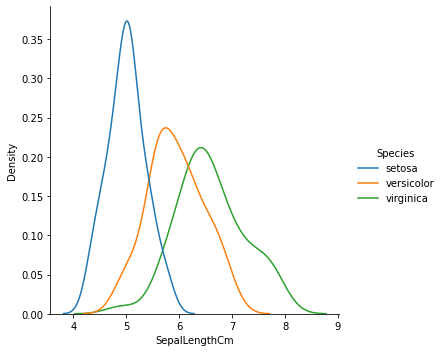

In [16]:
sns.displot(data=df , x = "SepalLengthCm",hue = "Species" ,kind='kde')

In [17]:
df.groupby('Species')['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


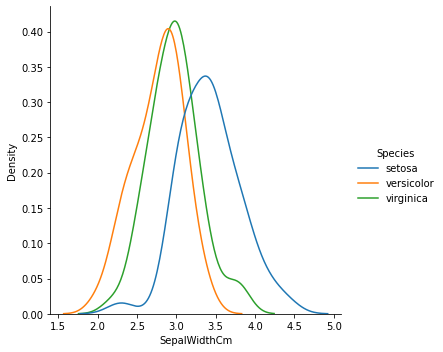

In [18]:
sns.displot(data=df , x = "SepalWidthCm",hue = "Species" , kind='kde')

In [19]:
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


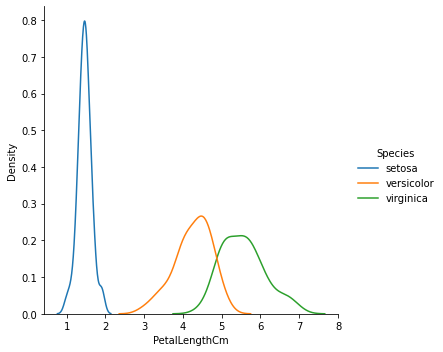

In [20]:
sns.displot(data=df , x = "PetalLengthCm",hue = "Species" , kind='kde' )

In [21]:
df.groupby('Species')['PetalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


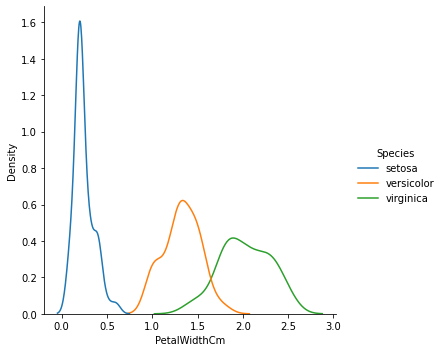

In [22]:
sns.displot(data=df , x = "PetalWidthCm",hue = "Species" , kind='kde' )

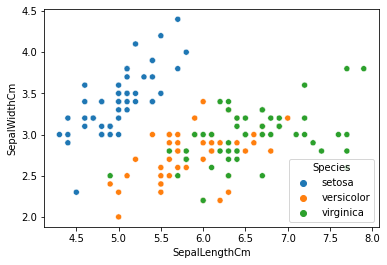

In [23]:
sns.scatterplot(data=df , 
                x = "SepalLengthCm",
                y = "SepalWidthCm",
                hue = "Species")

As described in above distplots plots, we are not getting clear seperation between the flower category by SepalLength & SepalWidth.

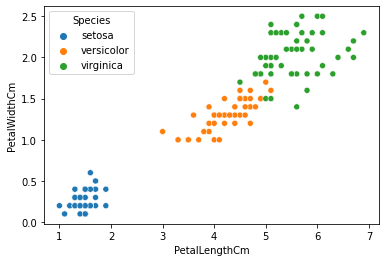

In [24]:
sns.scatterplot(data=df , 
                x = "PetalLengthCm",
                y = "PetalWidthCm",
                hue = "Species")

With this PetalLength & PetalWidth , we can clearly seperate the Setosa flowers. Even versicolor & virginica can also seperate but not 100%.

But I hope in higher dimensions, we can seperate them very clearly.

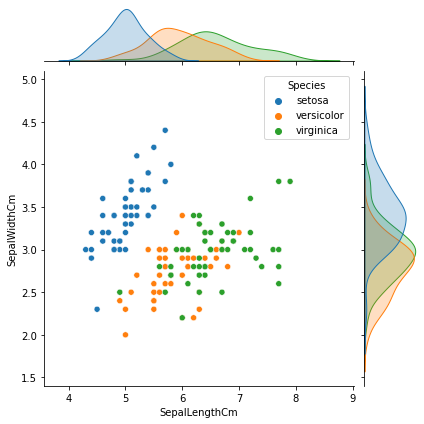

In [25]:
sns.jointplot(data=df,
             x = "SepalLengthCm",
             y = "SepalWidthCm",
            hue = "Species")

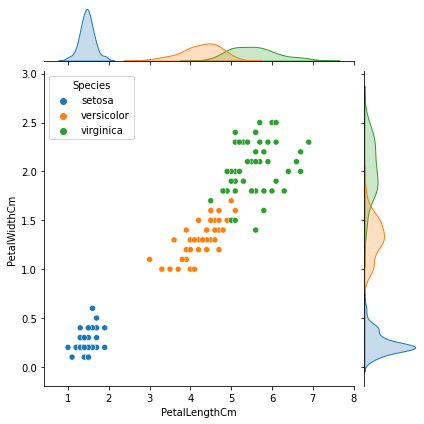

In [26]:
sns.jointplot(data=df,
             x = "PetalLengthCm",
             y = "PetalWidthCm",
            hue = "Species")

### CO-RELEATION ANALYSIS

In [27]:
cor_matrix = df.corr()
cor_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


The SepalLength , PetalLength , PetalWidth are in very good co-releation. But the SepalWidth is not in co-releation.

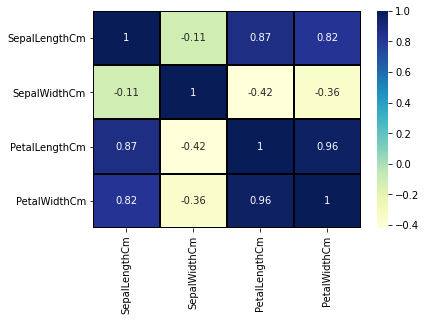

In [28]:
sns.heatmap(cor_matrix,
            annot = True,
            cmap = "YlGnBu",
            linewidth = 1,
            linecolor = 'black')

# SUPERVISED LEARNING APPROCH

### Splitting the data into training set and test set

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
df.Species = LabelEncoder().fit_transform(df.Species)

In [60]:
X = df[['PetalLengthCm','PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]
y = df[['Species']]

In [62]:
X_train ,  X_test ,y_train , y_test = train_test_split(X,
                                                       y, 
                                                       test_size=0.25,
                                                       random_state=42)

In [63]:
print(X_train.shape , y_train.shape )
print(X_test.shape , y_test.shape )

(112, 4) (112, 1)
(38, 4) (38, 1)


### Implementing Logisitic Regression

In [64]:
clf = LogisticRegression(random_state=0).fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
y_pred = clf.predict(X_test)

In [66]:
confusion_matrix(y_test , y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [67]:
accuracy_score(y_test , y_pred)

1.0

# UNSUPERVISED LEARNING APPROCH

### Implementing K-Mean Cluster

In [76]:
from sklearn.cluster import KMeans

In [77]:
kmean_clu = KMeans(n_clusters = 3 , random_state=42 ).fit(X_train)

In [78]:
y_pred = kmean_clu.predict(X_test)

In [79]:
confusion_matrix(y_test , y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 10]])

In [80]:
accuracy_score(y_test , y_pred)

0.9473684210526315